# <center>Dzongkha Handwritten Digits Detection</center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Load and Preprocess the Datasets

In [5]:
import os
import glob

# Define the path to the folder containing the images
IMAGE_FOLDER = "Datasets"
IMAGE_FOLDER_TRAIN = "/content/drive/Shareddrives/shared/Dzongkha Handwritten Digit Detection/train"
IMAGE_FOLDER_TEST = "/content/drive/Shareddrives/shared/Dzongkha Handwritten Digit Detection/test"
# Get the paths to all the image files in the folder
image_paths = glob.glob(os.path.join(IMAGE_FOLDER, "*/*.jpg"))

# Create a list of tuples containing the file path and label
data = [(path, os.path.basename(os.path.dirname(path))) for path in image_paths]

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create an ImageDataGenerator for preprocessing the images
data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True
)

# Load the training set
train_generator = data_generator.flow_from_directory(
    directory=IMAGE_FOLDER_TRAIN,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

# Load the validation set
val_generator = data_generator.flow_from_directory(
    directory=IMAGE_FOLDER_TEST,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 8408 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


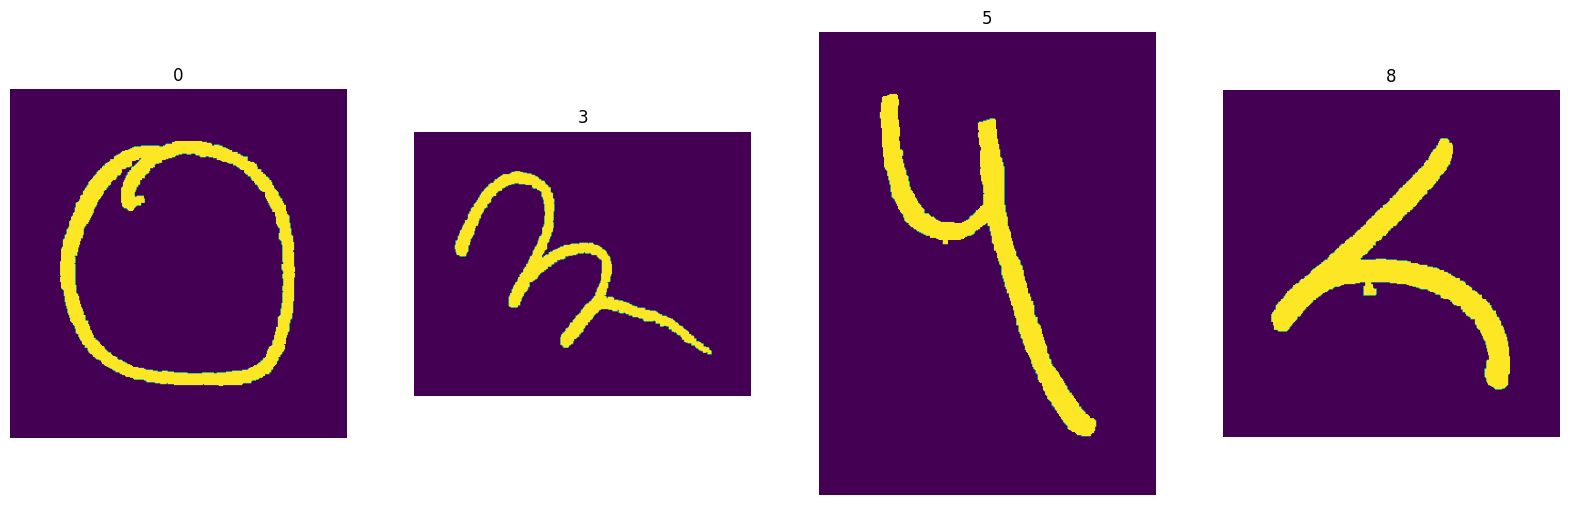

In [ ]:
# display some Images used for training the model
from PIL import Image
import matplotlib.pyplot as plt

images = [
    "/content/drive/Shareddrives/shared/Dzongkha Handwritten Digit Detection/train/0/1630909281.371999.jpg",
    "/content/drive/Shareddrives/shared/Dzongkha Handwritten Digit Detection/train/3/1630909281.4274619.jpg",
    "/content/drive/Shareddrives/shared/Dzongkha Handwritten Digit Detection/train/5/1630851917.0338528.jpg",
    "/content/drive/Shareddrives/shared/Dzongkha Handwritten Digit Detection/train/8/1631284582.305068.jpg"
]

def plot_images(images):
    fig, axs = plt.subplots(1, len(images), figsize=(20, 10))
    for i, image_path in enumerate(images):
        # Define the path to the image
        image_path = image_path

        # Load the image
        img = Image.open(image_path)

        # Display the image
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(image_path.split("/")[7])
    plt.show()

# call the function
plot_images(images)

In [ ]:
# display the labels
for target_name, label in train_generator.class_indices.items():
    print(f"{target_name} --> {label}")

0 --> 0
1 --> 1
2 --> 2
3 --> 3
4 --> 4
5 --> 5
6 --> 6
7 --> 7
8 --> 8
9 --> 9


### 2. Build the Base Model

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model without the top (classification) layer
base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=train_generator.image_shape
)

# Add a new top (classification) layer for our bird species classification task
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(len(train_generator.class_indices), activation="softmax")(x)

# Create a new model that combines the VGG16 base model with our new top layer
model = Model(inputs=base_model.input, outputs=x)

# Freeze the weights of the VGG16 base model so that we only train the new top layer
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


### Compile the Model

In [ ]:
from tensorflow.keras.optimizers import Adam

# compile the model
model.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(learning_rate=0.0001),
    metrics = ["accuracy"]
)

In [ ]:
# display the model architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Train the model

In [8]:
batch_size = 32

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 20,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size
)

Epoch 1/20
87/87 [==============================] - 910s 10s/step - loss: 0.6524 - accuracy: 0.7876 - val_loss: 0.2116 - val_accuracy: 0.9340
Epoch 2/20
87/87 [==============================] - 13s 147ms/step - loss: 0.1663 - accuracy: 0.9538 - val_loss: 0.1675 - val_accuracy: 0.9479
Epoch 3/20
87/87 [==============================] - 13s 149ms/step - loss: 0.1272 - accuracy: 0.9657 - val_loss: 0.1046 - val_accuracy: 0.9722
Epoch 4/20
87/87 [==============================] - 13s 148ms/step - loss: 0.0891 - accuracy: 0.9787 - val_loss: 0.1177 - val_accuracy: 0.9653
Epoch 5/20
87/87 [==============================] - 14s 159ms/step - loss: 0.0568 - accuracy: 0.9841 - val_loss: 0.1070 - val_accuracy: 0.9479
Epoch 6/20
87/87 [==============================] - 14s 159ms/step - loss: 0.0553 - accuracy: 0.9867 - val_loss: 0.0966 - val_accuracy: 0.9792
Epoch 7/20
87/87 [==============================] - 13s 147ms/step - loss: 0.0612 - accuracy: 0.9823 - val_loss: 0.0733 - val_accuracy: 0.9792


### Evaluate the model

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    IMAGE_FOLDER_TEST,
    target_size = (224, 224),
    batch_size = batch_size,
    class_mode = "categorical"
)

Found 1500 images belonging to 10 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

47/47 [==============================] - 327s 7s/step - loss: 0.0633 - accuracy: 0.9833
Test Loss: 0.06325571984052658
Test Accuracy: 0.9833333492279053


### Save the trained model

In [ ]:
model.save("/content/drive/Shareddrives/shared/Dzongkha Handwritten Digit Detection/Model/dzongkha_digits_classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Import the saved model

In [2]:
from keras.models import load_model

# load the model
loaded_model = load_model("/content/drive/Shareddrives/shared/Dzongkha Handwritten Digit Detection/Model/dzongkha_digits_classifier.h5")

# display the it's architecture
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Make a Prediction using the Model

1/1 [==============================] - 1s 1s/step


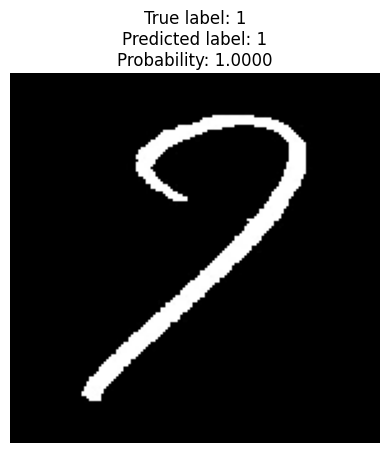

1/1 [==============================] - 1s 519ms/step


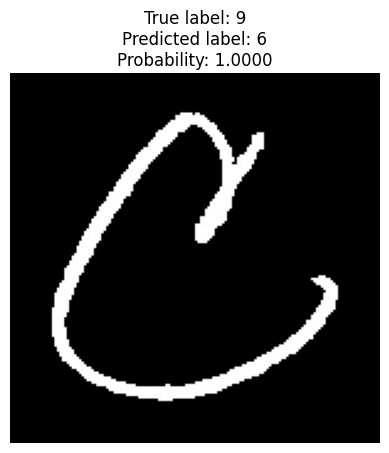

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("/content/drive/Shareddrives/shared/Dzongkha Handwritten Digit Detection/Model/dzongkha_digits_classifier.h5")

# Define the path to the test images
test_dir = "/content/drive/Shareddrives/shared/Dzongkha Handwritten Digit Detection/test"

# Define the dictionary to map the class indices to their respective class names
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

# Function to preprocess the image
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Get the list of all images in the test directory
test_images = os.listdir(test_dir)

# Pick a correctly classified image
correct_image_path = os.path.join(test_dir, '1', '1630851911.942435.jpg')

# Preprocess the image
correct_image = preprocess_image(correct_image_path)

# Get the true label of the image
true_label = os.path.basename(os.path.dirname(correct_image_path))

# Get the predicted label of the image
predicted_prob = model.predict(correct_image)[0]
predicted_label = class_names[np.argmax(predicted_prob)]

# Display the image
plt.imshow(load_img(correct_image_path, target_size=(150, 150)))
plt.title(f'True label: {true_label}\nPredicted label: {predicted_label}\nProbability: {predicted_prob[np.argmax(predicted_prob)]:.4f}')
plt.axis('off')
plt.show()

# Pick a misclassified image
misclassified_image_path = os.path.join(test_dir, '9', '1630909599.861044.jpg')

# Preprocess the image
misclassified_image = preprocess_image(misclassified_image_path)

# Get the true label of the image
true_label = os.path.basename(os.path.dirname(misclassified_image_path))

# Get the predicted label of the image
predicted_prob = model.predict(misclassified_image)[0]
predicted_label = class_names[np.argmax(predicted_prob)]

# Display the image
plt.imshow(load_img(misclassified_image_path, target_size=(150, 150)))
plt.title(f'True label: {true_label}\nPredicted label: {predicted_label}\nProbability: {predicted_prob[np.argmax(predicted_prob)]:.4f}')
plt.axis('off')
plt.show()

10/10 [==============================] - 165s 16s/step
              precision    recall  f1-score   support

           0       0.10      0.10      0.10        30
           1       0.10      0.10      0.10        30
           2       0.07      0.07      0.07        30
           3       0.00      0.00      0.00        30
           4       0.03      0.03      0.03        30
           5       0.07      0.07      0.07        30
           6       0.10      0.10      0.10        30
           7       0.10      0.10      0.10        30
           8       0.13      0.13      0.13        30
           9       0.13      0.13      0.13        30

    accuracy                           0.08       300
   macro avg       0.08      0.08      0.08       300
weighted avg       0.08      0.08      0.08       300



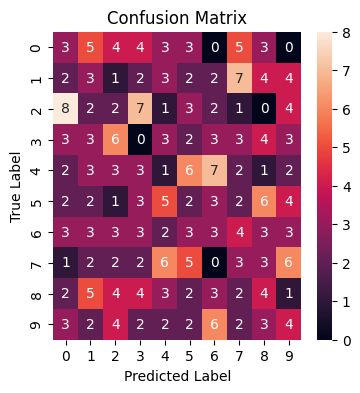

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
# Set the figure size
plt.figure(figsize=(4, 4))
predIdxs = model.predict(val_generator, steps =
len(val_generator))
y_pred = np.argmax(predIdxs, axis = 1)
# Define confusion matrix
# confusion_matrix(y_true, y_pred)
matrix = confusion_matrix(val_generator.classes,
y_pred)
sns.heatmap(matrix, annot=True, cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
# Classification Report
print(classification_report(val_generator.classes,
y_pred))

#### <center>... The End! ...</center>